In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

try:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'
except:
    plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'BMJUA_ttf'



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [2]:
df_qna = pd.read_csv('../data/wiggle.qna.csv')

In [3]:
df_product = pd.read_csv('../data/wiggle.product.csv')

In [4]:
with open('../data/pickles/df_salesBasic.pkl', "rb") as file:
    df_salesBasic = pickle.load(file)

## 데이터 전처리

### 결측치 변환 / id열 제거

In [5]:
df_qna = df_qna.fillna('-')

In [6]:
df_product = df_product.drop(columns='_id')

### 상품 카테고리 번호 지정

In [7]:
df_product['catagory_index'] = df_product.index.to_list()
df_product['full_category'] = df_product['large_category'] + ' ' + df_product['middle_category'] + ' ' + df_product['small_category']

### qna 상품 카테고리 번호 지정

In [8]:
# 카테고리 부여 함수 제작
def get_category(getlist,issame,fullcate):
    category_list = []
    cate_name_list = []
    issame = issame.to_list()
    for i in getlist:
        if i == '-':
            category_list.append(np.nan)
            cate_name_list.append(np.nan)
        elif i in issame:
            category_list.append(int(issame.index(i)))
            cate_name_list.append(fullcate.iloc[int(issame.index(i))])
        else:
            category_list.append('판매종료상품')
            cate_name_list.append('판매종료상품')

    large_category =[]
    middle_category = []
    small_category = []

    for i in cate_name_list:
        try:
            temp_list = i.split(' ')
        except:
            temp_list = []

        if len(temp_list) != 3:
            large_category.append(np.nan)
            middle_category.append(np.nan)
            small_category.append(np.nan)
        else:
            large_category.append(temp_list[0])
            middle_category.append(temp_list[1])
            small_category.append(temp_list[2])

    return category_list, cate_name_list,large_category,middle_category,small_category

In [9]:
df_qna['get_category'], df_qna['category_name'],df_qna['large_category'],df_qna['middle_category'],df_qna['small_category'] = get_category(df_qna['product_name'],df_product['title'],df_product['full_category'])

- 월별 날짜 묶기

In [10]:
df_qna['date'] = df_qna['date'].apply(lambda x : pd.to_datetime(x).strftime("%Y-%m"))

In [11]:
df_qna[:5]

,_id,index_num,product_href,product_name,category,customer_name,date,get_category,category_name,large_category,middle_category,small_category
0,6631b8fae29b6ec61bcab039,23134,https://wiggle-wiggle.com/product/$1/$2/,-,상품 문의,나****,2024-05,NaN,NaN,NaN,NaN,NaN
1,6631b8fae29b6ec61bcab03a,23133,https://wiggle-wiggle.com/product/$1/$2/,-,교환/환불 문의,김****,2024-05,NaN,NaN,NaN,NaN,NaN
2,6631b8fbe29b6ec61bcab03b,23132,https://wiggle-wiggle.com/product/%EB%B3%B4%EA...,[보그스X위글위글] 아동용 레인부츠 - BLUE,상품 문의,박****,2024-05,142,fashion 신발 -,fashion,신발,-
3,6631b8fbe29b6ec61bcab03c,23131,https://wiggle-wiggle.com/product/%ED%92%80%EB...,풀림방지 실리콘참 3 SET - Cherry,상품 문의,박****,2024-05,162,fashion 액세서리 실리콘참,fashion,액세서리,실리콘참
4,6631b8fbe29b6ec61bcab03d,23130,https://wiggle-wiggle.com/product/sk%EB%A7%A4%...,[SK매직X위글위글] 미니 정수기,상품 문의,김****,2024-05,272,electronics - -,electronics,-,-


### 카테고리 별 문의 수

In [12]:
df_qna.value_counts('large_category').index

Index(['fashion', 'living', 'digital', 'outdoor', 'family', 'collabo',
       'electronics'],
      dtype='object', name='large_category')

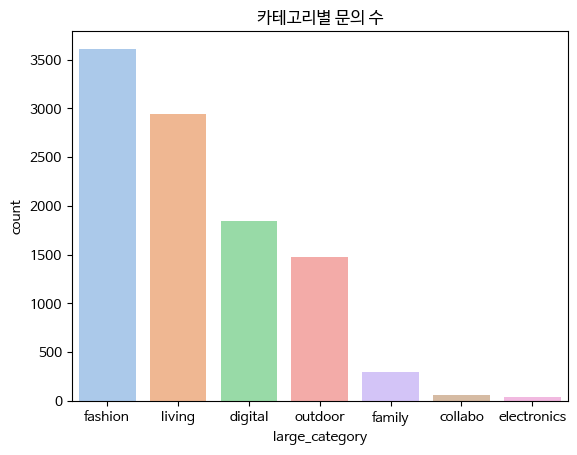

In [19]:
order = df_qna.value_counts('large_category').index
sns.countplot(data=df_qna, x='large_category', palette='pastel',order=order)

plt.title('카테고리별 문의 수')
plt.show()

### 상품 별 문의 수

In [14]:
df_qna.value_counts('product_name')

product_name
-                                5138
[앱코X위글위글] 키보드 - Color Mix         597
보냉백(S/L) - Smile We Love          489
레디백                               445
보냉백(L) - Smile We Love            415
                                 ... 
파자마 세트(롱) - Wild And Free           1
양면 버킷햇 - Greenery Check             1
암막 양우산 - Smile We Love Safari       1
노즈워크 장난감 - Lobster                  1
[주문제작] 하드케이스 - Cherry               1
Name: count, Length: 789, dtype: int64

### 문의 종류

In [15]:
df_qna.value_counts('category')


category
상품 문의              14387
배송 문의               2278
기타 문의               2185
교환/환불 문의            1806
재입고                  586
                   ...  
사이즈 문의 드립니다!           1
사이즈 문의드립니다!            1
사이즈 변경                 1
사이즈 변경 가능할까요? ㅠ        1
회원탈퇴요청드립니다.            1
Name: count, Length: 1107, dtype: int64

### 기간별 문의 수

In [16]:
df_qna.value_counts('date')

date
2023-02    2118
2023-07    2098
2022-08    2018
2022-12    1599
2023-09    1566
2023-12    1351
2024-02    1306
2022-09    1167
2024-03    1079
2023-04    1021
2023-08     975
2023-05     939
2023-06     890
2022-10     881
2022-11     880
2023-10     816
2023-11     773
2023-03     741
2023-01     712
2024-04     673
2024-01     670
2022-07     101
2021-09      82
2024-05       9
Name: count, dtype: int64

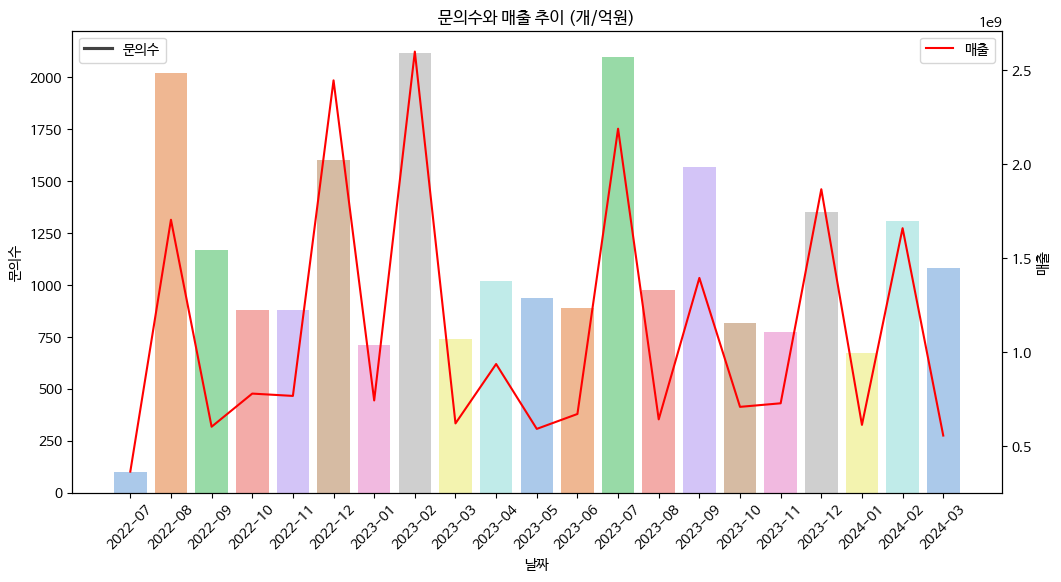

In [23]:
plt.figure(figsize=(12, 6))

# 뉴스 개수를 시간에 따라 추이를 보여주는 바플롯
news_counts = df_qna.query('date >= "2022-03" & date <= "2024-03"').groupby('date').size()
sns.barplot(x=news_counts.index, y=news_counts, palette='pastel')

plt.title('문의수와 매출 추이 (개/억원)')
plt.xlabel('날짜')
plt.ylabel('문의수')
plt.xticks(rotation=45)
plt.legend(['문의수'], loc='upper left')

# 두 번째 축 설정
ax2 = plt.gca().twinx()
ax2.set_ylabel('매출')

# 매출 데이터를 시간에 따라 추이를 보여주는 라인 플롯
sales_data = df_salesBasic.query('referenceMonth >= "2022-07" & referenceMonth <= "2024-03"')
sns.lineplot(data=sales_data, x='referenceMonth', y='inCome', color='red', ax=ax2)

plt.legend(['매출'], loc='upper right')
plt.show()

In [24]:
df_product

,large_category,middle_category,small_category,image_url,title,old_price,new_price,discount_rate,review_count,isSoldout,catagory_index,full_category
0,living,문구,펜/노트,https://cafe24img.poxo.com/wigglewiggle20/web/...,하드 커버 스프링 노트 - Spring Garden,16500,14800,10%,11,True,0,living 문구 펜/노트
1,living,문구,펜/노트,https://cafe24img.poxo.com/wigglewiggle20/web/...,PVC 펜,4500,4500,NaN,84,True,1,living 문구 펜/노트
2,living,문구,펜/노트,https://cafe24img.poxo.com/wigglewiggle20/web/...,[벨리곰X위글위글] PVC 펜 - Twin Bears,4500,4500,NaN,84,True,2,living 문구 펜/노트
3,living,문구,펜/노트,https://cafe24img.poxo.com/wigglewiggle20/web/...,[벨리곰X위글위글] 스프링 노트 - Twin Bears,14500,13200,9%,31,True,3,living 문구 펜/노트
4,living,문구,펜/노트,https://cafe24img.poxo.com/wigglewiggle20/web/...,PVC 펜,4500,4500,NaN,192,True,4,living 문구 펜/노트
...,...,...,...,...,...,...,...,...,...,...,...,...
342,collabo,KAKAOFRIENDS,-,//wiggle-wiggle.com/web/product/medium/202403/...,[카카오프렌즈X위글위글] 기내용 캐리어,120000,120000,NaN,6,False,342,collabo KAKAOFRIENDS -
343,collabo,ABKO,-,//wiggle-wiggle.com/web/product/medium/202401/...,[앱코X위글위글] 키보드 - Color Mix,38200,38200,NaN,404,False,343,collabo ABKO -
344,collabo,ABKO,-,//wiggle-wiggle.com/web/product/medium/202404/...,[앱코X위글위글] 무선 키보드 & 키패드 & 마우스 SET,78800,69800,NaN,9,False,344,collabo ABKO -
345,collabo,ABKO,-,//wiggle-wiggle.com/web/product/medium/202308/...,[앱코X위글위글] 버티컬 마우스 - Ivory,49800,49800,NaN,125,False,345,collabo ABKO -
